In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
color = sns.color_palette()
from sklearn.linear_model import LinearRegression
import random
import datetime as dt
%matplotlib inline


# Project: Zillow House Price Prediction
We are provided with a list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016. Zillow provides a “Zestimate”, which is an estimated property value. Our task in this competition is to predict the the difference between the actual price and the estimate of the price (Zestimate). So, in fact we are predicting, where Zillow’s Zestimate will be good, and where it will be bad.

## Loading dataset

### Import data from Kaggle - Zillow’s Home Value Prediction

In [3]:
train_df=pd.read_csv('C:/Users/blanc/Desktop/zillow/train_2016_v2.csv')
property_df=pd.read_csv('C:/Users/blanc/Desktop/zillow/properties_2016.csv')

C:\Users\blanc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
property_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


#### Distribution of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data

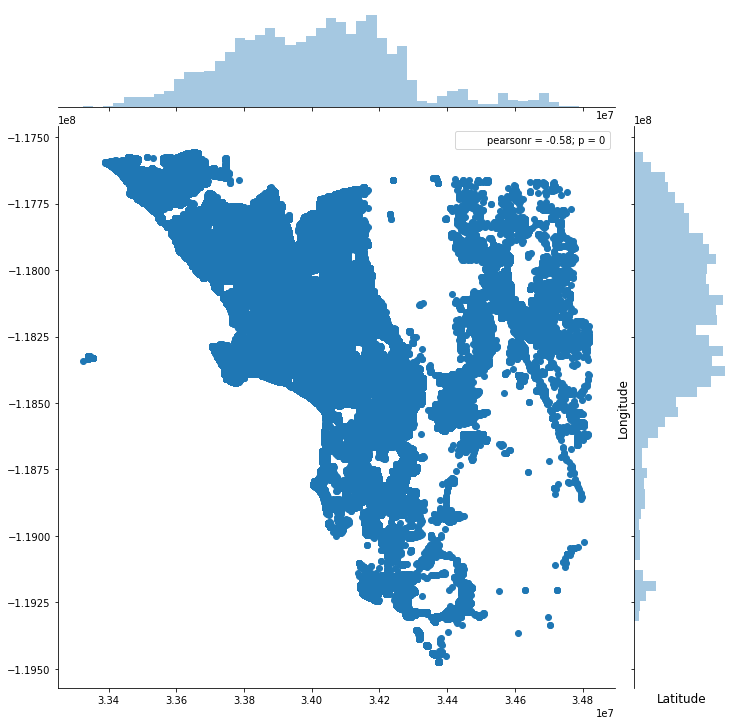

In [6]:
plt.figure(figsize=(12,12))
sns.jointplot(x=property_df.latitude.values, y=property_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

### Combine train and property dataset

We have about 90,811 rows in train but we have about 2,985,217 rows in properties file. So let us merge the two files and then carry out our analysis.

In [8]:
train = pd.merge(train_df, property_df, on='parcelid', how='left')
train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15        

#### Check data types


In [44]:
train_data_type=train.dtypes.value_counts()
train_data_type

float64    53
object      6
int64       1
dtype: int64

## Data Explore Analysis

### Check the missing values

In [10]:
train_NA=train.isnull().sum().reset_index()
train_NA.columns = ['column_name', 'NA_count']
train_NA['missing_ratio'] = train_NA['NA_count'] / train_df.shape[0]

In [277]:
train_NA_sort=train_NA.sort_values(by=['missing_ratio'])

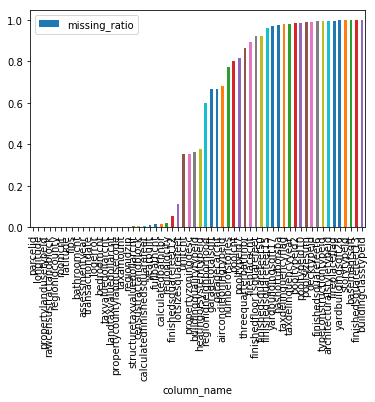

In [56]:
train_NA_sort.plot(x='column_name',y='missing_ratio',kind='bar')

### Drop with the missing columns

We drop the variables with more than 80% missing values.
Now we have 36 variables left. For the left variables who have missing values,let us just impute the missing values with mean values to them.

In [11]:
train_NA[train_NA['missing_ratio']<0.8].index


Int64Index([ 0,  1,  2,  3,  6,  7,  9, 10, 13, 14, 19, 21, 22, 23, 25, 26, 27,
            28, 34, 35, 36, 37, 38, 39, 40, 41, 42, 46, 49, 50, 52, 53, 54, 55,
            56, 59],
           dtype='int64')

In [12]:
remain_train=train_NA.drop(train_NA[train_NA['missing_ratio']>0.8].index)
remain_col=remain_train['column_name']
train=train[remain_col]

In [13]:
mean_values= train.mean(axis=0)
train_new = train.fillna(mean_values) 
## 90275 rows × 36 columns

### Check the response variable logerror and remove outlier
We can see that logerror is very centered to 0, indicatinf that Zestimate works quite well.

In [15]:
train_new['logerror'].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

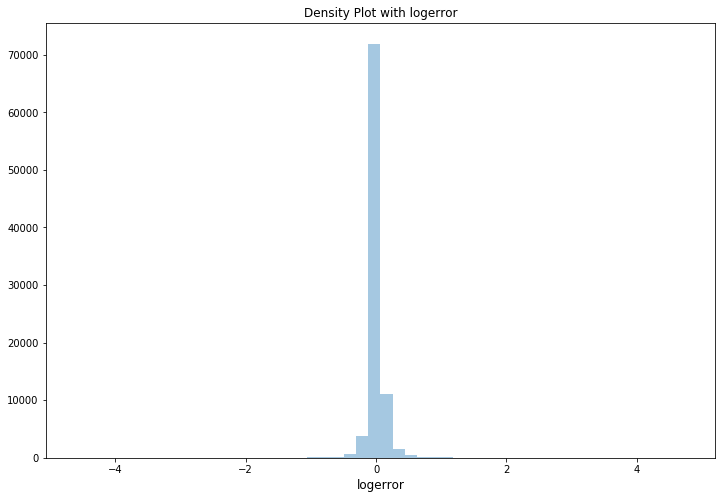

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(train_new.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.title('Density Plot with logerror')
plt.show()

In [18]:
train_df=train[ train_new.logerror > -0.4 ]
train_df=train[ train_new.logerror < 0.419 ]
##size 89208 X 36

### Correlation with nemeric variables


To select variables,we first calculate the correlation between numeric variables and response variable logerror

Let's drop the categorical columns first and only find the correlation with numeric columns

From the correlation results, we can see that the corrrelation between independent variables and response variable logerror are generally low. With relatively higher correlation are finishedsquarefeet12,calculatedfinishedsquarefeet,threequarterbathnbr,fireplacecnt,fullbathcnt,bathroomcnt,garagecarcnt,finishedfloor1squarefeet. Finishedsquarefeet12 has the strongest positive correlation with logerror. heatingorsystemtypeid has the strongest negative correlation with logerror.

In [19]:
train_numeric=train_df.drop(['parcelid','transactiondate','propertycountylandusecode','propertyzoningdesc'],axis=1)

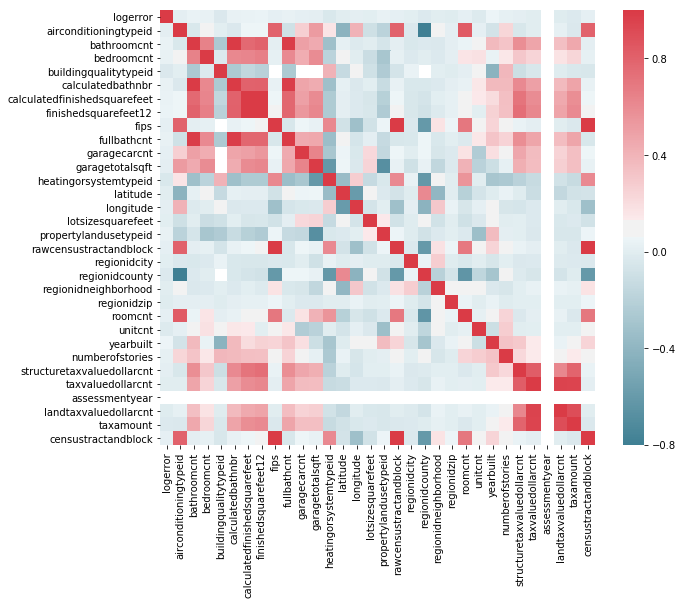

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train_numeric.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [21]:
cor_sort=train_numeric.corr().abs().sort_values('logerror',ascending=False)

In [289]:
cor_sort['logerror']

logerror                        1.000000
yearbuilt                       0.053324
finishedsquarefeet12            0.046680
bathroomcnt                     0.041807
heatingorsystemtypeid           0.038765
calculatedfinishedsquarefeet    0.038566
calculatedbathnbr               0.036318
bedroomcnt                      0.033970
propertylandusetypeid           0.033757
fullbathcnt                     0.033286
buildingqualitytypeid           0.029856
numberofstories                 0.026642
regionidcounty                  0.021062
censustractandblock             0.021029
fips                            0.020392
rawcensustractandblock          0.020385
taxamount                       0.020052
roomcnt                         0.018689
unitcnt                         0.017549
garagecarcnt                    0.016748
structuretaxvaluedollarcnt      0.014459
garagetotalsqft                 0.011447
landtaxvaluedollarcnt           0.011443
longitude                       0.010576
airconditioningt

In [22]:
cor_sort1=train_numeric.corr().sort_values('logerror')

Let us take the variables with high correlation values and then do some analysis on them.

In [291]:
cor_sort['logerror']>0.02

logerror                         True
yearbuilt                        True
finishedsquarefeet12             True
bathroomcnt                      True
heatingorsystemtypeid            True
calculatedfinishedsquarefeet     True
calculatedbathnbr                True
bedroomcnt                       True
propertylandusetypeid            True
fullbathcnt                      True
buildingqualitytypeid            True
numberofstories                  True
regionidcounty                   True
censustractandblock              True
fips                             True
rawcensustractandblock           True
taxamount                        True
roomcnt                         False
unitcnt                         False
garagecarcnt                    False
structuretaxvaluedollarcnt      False
garagetotalsqft                 False
landtaxvaluedollarcnt           False
longitude                       False
airconditioningtypeid           False
regionidzip                     False
lotsizesquar

In [23]:
remain_variables=cor_sort[cor_sort['logerror']>0.02].index

In [24]:
remain_variables

Index(['logerror', 'yearbuilt', 'finishedsquarefeet12', 'bathroomcnt',
       'heatingorsystemtypeid', 'calculatedfinishedsquarefeet',
       'calculatedbathnbr', 'bedroomcnt', 'propertylandusetypeid',
       'fullbathcnt', 'buildingqualitytypeid', 'numberofstories',
       'regionidcounty', 'censustractandblock', 'fips',
       'rawcensustractandblock', 'taxamount'],
      dtype='object')

### Area Variables Analysis:

Finished SquareFeet 12,calculatedfinishedsquarefeet

Let us see how these variables varies with the log error.

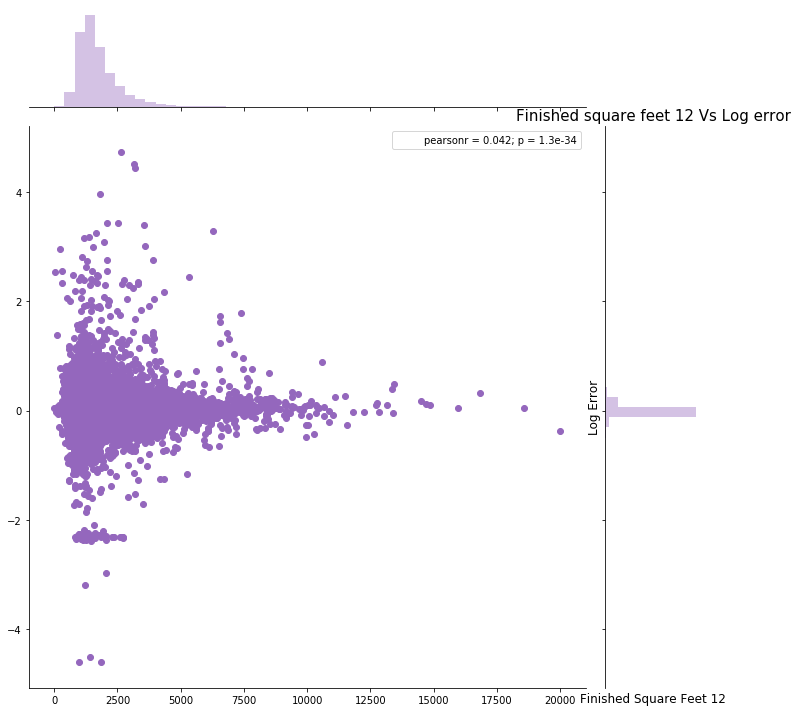

In [295]:
plt.figure(figsize=(12,12))
sns.jointplot(x=train.finishedsquarefeet12.values, y=train.logerror.values, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

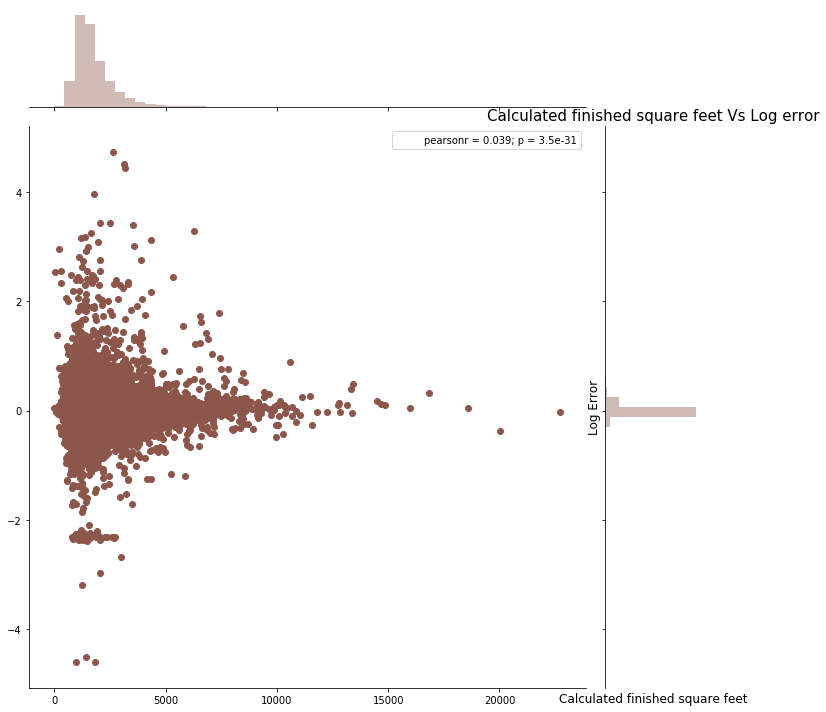

From these two plot, we can see that with increase of 'Finished Square Feet 12' and
'Calculated finished square feet', the logerror is descreasing. 

So maybe the saleprice of big house is easy to predict?

And from the similar pattern of these two plots, we can draw a conclusion that they are high-correlated.

#### Numeric Variables:


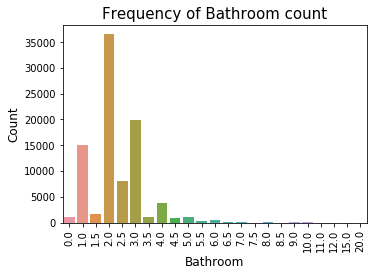

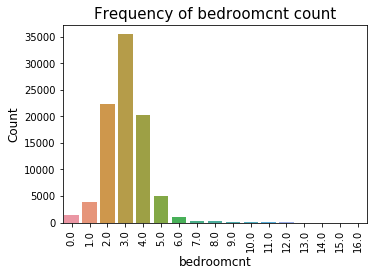

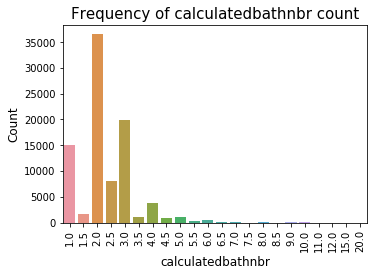

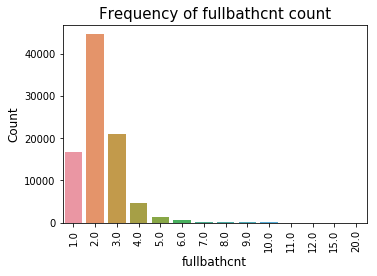

In [157]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x="bathroomcnt", data=train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(222)
sns.countplot(x="bedroomcnt", data=train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('bedroomcnt', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of bedroomcnt count", fontsize=15)
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(223)
sns.countplot(x="calculatedbathnbr", data=train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('calculatedbathnbr', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of calculatedbathnbr count", fontsize=15)
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(224)
sns.countplot(x="fullbathcnt", data=train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('fullbathcnt', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of fullbathcnt count", fontsize=15)
plt.show()

#### Categorical variables:
Transaction date& Year built

For Transaction date, we generate a new feature--txnmonth(transaction month) here.
We can see that the April to June are the best predicted month, while the beginning and end months are less accurate.

About the yearbuilt, the graph shows that the prediction for the early-year built houses are less accurate.

In [162]:
train['transactiondate'] = pd.to_datetime(train['transactiondate'], errors='coerce')

In [163]:
train['transaction_month'] = train['transactiondate'].dt.month

In [165]:
traingroupedMonth = train.groupby(['transaction_month'])['logerror'].mean().to_frame().reset_index()

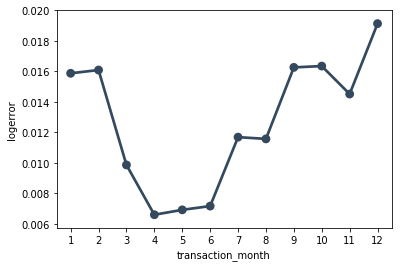

In [170]:
sns.pointplot(x=traingroupedMonth['transaction_month'], y=traingroupedMonth['logerror'], data=traingroupedMonth, join=True,color="#34495e")

Text(0.5,0,'yearbuilt')

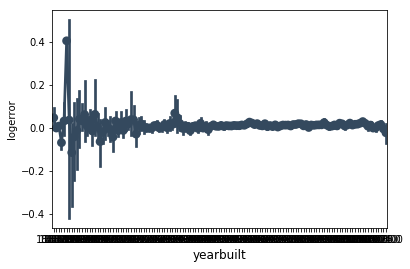

In [172]:
sns.pointplot(x=train['yearbuilt'], y=train['logerror'], data=train, join=True,color="#34495e")
plt.xlabel('yearbuilt', fontsize=12)

###  Conclusion:
Based on correaltion calculation, data visualization and my own understanding and knowledge, the features I plan to select are: bathroomcnt, bedroomcnt,structuretaxvaluedollarcnt, calculatedfinishedsquarefeet, calculatedbathnbr, fullbathcnt, finishedsquarefeet12, fips, yearbuilt, longitude, altitude, taxamount. 


### Feature Engineering:
Tax ratio=taxamount/taxvaluedollarcnt

Tax ratio can not be over 100%. We can see that there are at least 5 observations are errors.

We drop these outliers and compare the correlation between logerror and tax_ratio with the correlation between logerror and taxamount.

We can see that the correlation between logerror ad tax_ratio is much stronger than the tax_property.

In [329]:
train_df['tax_ratio']=train_df['taxamount']/train_df['taxvaluedollarcnt']

C:\Users\blanc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [330]:
train_df['tax_ratio'][train_df['tax_ratio']>1].count()

0

In [315]:
train_df['tax_ratio'][train_df['tax_ratio']>1].index

Int64Index([13388, 16045, 25390, 41738, 79750], dtype='int64')

In [331]:
train_df=train.drop(train_df.index[[13388,16045, 25390, 41738, 79750]])

In [317]:
train_df['tax_ratio'].corr(train_df['logerror'])

-0.0517032236616645

In [318]:
train_df['taxamount'].corr(train_df['logerror'])

-0.006656017040189196

### Using RF to choose important features:
We had an understanding of important variables from the univariate analysis. But this is on a stand alone basis and also we have linearity assumption. Now let us build a non-linear model to get the important variables by building Extra Trees model.

From the cumulative importance plot, we can see that 18 features can explain above 95% importance of feature. There are:
'longitude', 'structuretaxvaluedollarcnt', 'tax_ratio', 'latitude',
       'lotsizesquarefeet', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'calculatedfinishedsquarefeet', 'yearbuilt',
       'finishedsquarefeet12', 'regionidzip', 'censustractandblock',
       'regionidneighborhood', 'rawcensustractandblock', 'regionidcity',
       'bedroomcnt', 'garagetotalsqft', 'bathroomcnt'
       
Comparing the results from univariate analysis and non-linear model, we can find the common important 6 features:'yearbuilt','tax_ratio','finishedsquarefeet12','bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet'
   

In [340]:
train1=train_new[ train_new.logerror > -0.4 ]
train1=train_new[ train_new.logerror < 0.419 ]
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89208 entries, 0 to 90273
Data columns (total 36 columns):
parcelid                        89208 non-null int64
logerror                        89208 non-null float64
transactiondate                 89208 non-null object
airconditioningtypeid           89208 non-null float64
bathroomcnt                     89208 non-null float64
bedroomcnt                      89208 non-null float64
buildingqualitytypeid           89208 non-null float64
calculatedbathnbr               89208 non-null float64
calculatedfinishedsquarefeet    89208 non-null float64
finishedsquarefeet12            89208 non-null float64
fips                            89208 non-null float64
fullbathcnt                     89208 non-null float64
garagecarcnt                    89208 non-null float64
garagetotalsqft                 89208 non-null float64
heatingorsystemtypeid           89208 non-null float64
latitude                        89208 non-null float64
longitude     

In [341]:
data=train1
train_y = data['logerror'].values
X_train=data.drop(['logerror','parcelid','transactiondate', 'propertyzoningdesc', 
                         'propertycountylandusecode'],axis=1)

In [343]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X_train)

In [345]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, train_y, test_size = 0.2, random_state = 42)


In [346]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

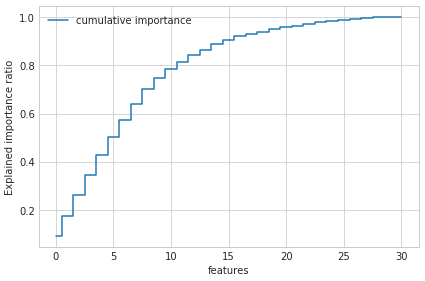

In [347]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
cum_var_exp = np.cumsum(importances[indices])
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.step(range(importances.size), cum_var_exp, where='mid',
             label='cumulative importance')
    plt.ylabel('Explained importance ratio')
    plt.xlabel('features')
    plt.legend(loc='best')
    plt.tight_layout()

In [350]:
indices = np.argsort(importances)[::-1][:20]
names=train_df.columns.values[indices]
names

array(['numberofstories', 'garagecarcnt', 'regionidzip',
       'heatingorsystemtypeid', 'garagetotalsqft', 'yearbuilt',
       'regionidcounty', 'roomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'propertyzoningdesc', 'structuretaxvaluedollarcnt',
       'propertylandusetypeid', 'longitude', 'lotsizesquarefeet',
       'transactiondate', 'fips', 'rawcensustractandblock', 'bathroomcnt',
       'parcelid'], dtype=object)

### Build Simple Decision Tree Model


In [349]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [356]:
data['tax_ratio']=data['taxamount']/data['taxvaluedollarcnt']
data['tax_ratio'][data['tax_ratio']>1].count()
data['tax_ratio'][data['tax_ratio']>1].index

C:\Users\blanc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Int64Index([13388, 16045, 25390, 41738, 79750], dtype='int64')

In [357]:
train_df=train.drop(train_df.index[[13388,16045, 25390, 41738, 79750]])

In [358]:
from sklearn.ensemble import RandomForestRegressor
x = data[['yearbuilt','tax_ratio','finishedsquarefeet12','bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','numberofstories', 'garagecarcnt', 'regionidzip',
       'heatingorsystemtypeid', 'structuretaxvaluedollarcnt']]
y = data['logerror']
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state= 42)
model = RandomForestRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [361]:
pred

array([ 0.00614,  0.0018 , -0.06269, ...,  0.0143 , -0.03743,  0.0139 ])

### Result

-0.11870517540704517
0.016935179222047403


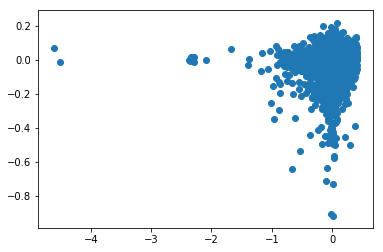

In [359]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
plt.scatter(y_test,pred)
residual = y_test - pred

In [ ]:
def MAE(y, ypred):
    #logerror=log(Zestimate)−log(SalePrice)
    return np.sum([abs(y[i]-ypred[i]) for i in range(len(y))]) / len(y)